<a href="https://colab.research.google.com/github/ryanleeallred/Job_Listing_NLP/blob/master/DE_Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving DE_Listings.csv to DE_Listings.csv


In [4]:
df = pd.read_csv('DE_Listings.csv')

print(df.shape)
df.head()

(147, 6)


,title,company,location,meta,description,url
0,Data Engineer - SQL,"PRIMUS Global Services, Inc","Menlo Park, CA",NaN,We have an immediate opportunity for a Data En...,http://www.indeed.com/rc/clk?jk=1fa1e1321bdd7e...
1,"Data Engineer, Data Sciences",Johnson & Johnson Family of Companies,"Raritan, NJ",NaN,"Janssen Pharmaceuticals, Inc., a member of Joh...",http://www.indeed.com/rc/clk?jk=685edbcbc8f04f...
2,Data Engineer,"ePromptus,Inc","Richmond, VA",NaN,"Data Engineer\nLocation: Richmond, VA (remote ...",http://www.indeed.com/rc/clk?jk=63f2e99dcee2fc...
3,Big Data Engineer- Intuit Again Returnship,Intuit,"Mountain View, CA 94041",NaN,“Intuit Again” is a returnship program at Intu...,http://www.indeed.com/rc/clk?jk=a67385e0e33634...
4,Data Engineer,Berkley,"Wilmington, DE 19809",NaN,Company Details:\nBerkley Technology Services ...,http://www.indeed.com/rc/clk?jk=a11394d042b3dc...


In [5]:
def clean_description(description):
  # All whitespace to single space
  description = ' '.join(description.split())
  # Accept one or more copies of punctuation
  # plus zero or more copies of a space
  # and replace it with a single space
  description = re.sub(r"""
               [-,.;@#?!&$:()/'"]+  
               \ *           
               """,
               " ",          
               description, flags=re.VERBOSE)
  return description

In [8]:
DE = df.drop('meta', axis=1)
DE = DE.dropna()
DE['cleaned'] = DE['description'].apply(clean_description)
DE['cleaned'] = DE['cleaned'].str.lower()

DE.head()

,title,company,location,description,url,cleaned
0,Data Engineer - SQL,"PRIMUS Global Services, Inc","Menlo Park, CA",We have an immediate opportunity for a Data En...,http://www.indeed.com/rc/clk?jk=1fa1e1321bdd7e...,we have an immediate opportunity for a data en...
1,"Data Engineer, Data Sciences",Johnson & Johnson Family of Companies,"Raritan, NJ","Janssen Pharmaceuticals, Inc., a member of Joh...",http://www.indeed.com/rc/clk?jk=685edbcbc8f04f...,janssen pharmaceuticals inc a member of johnso...
2,Data Engineer,"ePromptus,Inc","Richmond, VA","Data Engineer\nLocation: Richmond, VA (remote ...",http://www.indeed.com/rc/clk?jk=63f2e99dcee2fc...,data engineer location richmond va remote unt...
3,Big Data Engineer- Intuit Again Returnship,Intuit,"Mountain View, CA 94041",“Intuit Again” is a returnship program at Intu...,http://www.indeed.com/rc/clk?jk=a67385e0e33634...,“intuit again” is a returnship program at intu...
4,Data Engineer,Berkley,"Wilmington, DE 19809",Company Details:\nBerkley Technology Services ...,http://www.indeed.com/rc/clk?jk=a11394d042b3dc...,company details berkley technology services b...


In [9]:
DE.isnull().sum()

title          0
company        0
location       0
description    0
url            0
cleaned        0
dtype: int64

In [10]:
search_strings = {'agile': ['agile'],
                  "algorithm": ['algorithm'],
                  "analysis": ["analysis"],
                  "analyst": ["analyst"],
                  'analytics': ['analytics'],
                  'artificial intelligence': ['artificial intelligence', ' ai '],
                  'aws': [' aws ', 'amazon web services'],
                  'bachelor': ['bachelor'],
                  'big data': ['big data'],
                  'cloud': ['cloud'],
                  'dashboard': ['dashboard'],
                  'database': ['database', ' db '],
                  "deep learning": ['deep learning'],
                  "degree": ["degree"],
                  'developer': ['developer'],
                  'economics': ['economics'],
                  'excel': ['excel'],
                  'experiment': ['experiment'],
                  'experimental': ['experimental'],
                  "hadoop": ['hadoop'],
                  'hive': ['hive'],
                  'java': ['java'],
                  'junior': ['junior'],
                  "machine learning": ['machine learning', ' ml '],
                  'masters': ['masters', 'ms degree', 'masters degree'],
                  'math': [' math ', 'mathematical', 'mathematics'],
                  "numpy": ["numpy"],
                  "pandas": ["pandas"],
                  "python": ["python"],
                  'r': [' r '],
                  'report': ['report'],
                  'scala': ['scala'],
                  'senior': ['senior'],
                  "spark": ['spark', 'pyspark'],
                  "sql": ['sql'],
                  'statistics': ['statistics', 'statistical'],
                  'tableau': ['tableau'],
                  "time series": ['time series'],
                  }

In [11]:
# New Dataframe
string_dataframe = DE[['title', 'cleaned']]

print(string_dataframe.shape)
string_dataframe.head()

(120, 2)


,title,cleaned
0,Data Engineer - SQL,we have an immediate opportunity for a data en...
1,"Data Engineer, Data Sciences",janssen pharmaceuticals inc a member of johnso...
2,Data Engineer,data engineer location richmond va remote unt...
3,Big Data Engineer- Intuit Again Returnship,“intuit again” is a returnship program at intu...
4,Data Engineer,company details berkley technology services b...


In [12]:
def in_description(description, strings):
  found = False
  for string in strings:
    if string in description:
      found =  True
  return found

in_description(string_dataframe['cleaned'][0], ['pathrise'])

for key in search_strings:
  found_list = []
  for listing in string_dataframe['cleaned']:
    found_list.append(in_description(listing, search_strings[key]))
  string_dataframe[key] = found_list

# string_dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


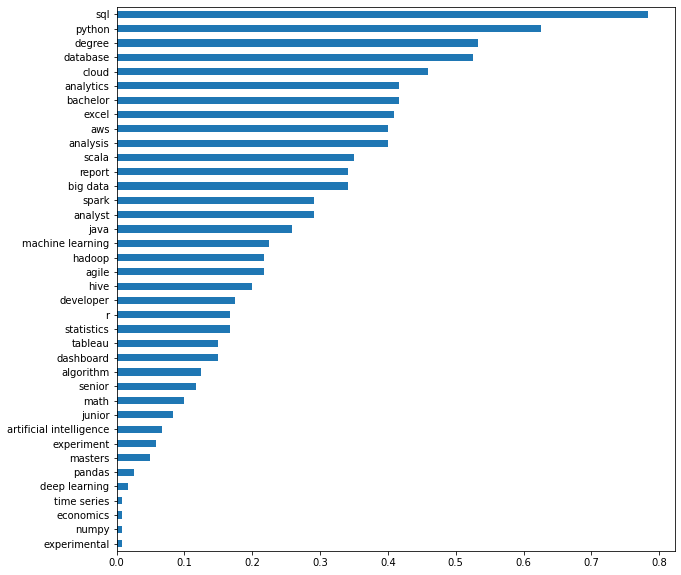

In [13]:
terms = string_dataframe.drop(['title', 'cleaned'], axis=1)

(terms.sum() / len(string_dataframe)).sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

plt.show()